# Mapping the Pandemic: A Statistical Approach to COVID-19

The COVID-19 pandemic has had a profound global impact, with varying effects across different countries. This analysis aims to provide a comprehensive overview of the pandemic’s progression, focusing on confirmed cases, death tolls, growth, and mortality rates over time. By comparing key countries and identifying trends, the analysis offers insights into the virus’s spread, the effectiveness of public health measures, and the evolving nature of the pandemic through its various waves. This data-driven approach helps in understanding the pandemic's trajectory and its implications on a global scale.

## Data Cleaning and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
covid_df = pd.read_csv("covid_19_data.csv")

In [3]:
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
covid_df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
# Change data types
covid_df[["Confirmed", "Deaths", "Recovered"]] = covid_df[["Confirmed", "Deaths", "Recovered"]].astype(int)

In [7]:
# Convert columns to date time columns
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'], errors='coerce')

# Convert the 'Last Update' column to datetime
covid_df['Last Update'] = pd.to_datetime(covid_df['Last Update'], errors='coerce')
covid_df['Last Update'] = covid_df['Last Update'].dt.strftime('%d/%m/%Y')

In [8]:
# Rename the column names
covid_df = covid_df.rename(columns={'ObservationDate': 'Observation Date', 'Country/Region': 'Country'})

In [9]:
# Replace multiple values in the Country column
covid_df['Country'] = covid_df['Country'].replace(['Mainland China', 'Macau', 'Hong Kong'], 'China')
covid_df['Country'] = covid_df['Country'].replace(['French Guiana', 'Reunion'], 'France')
covid_df['Country'] = covid_df['Country'].replace('Holy See', 'Rome')
covid_df['Country'] = covid_df['Country'].replace('occupied Palestinian territory', 'Palestine')
covid_df['Country'] = covid_df['Country'].replace("('St. Martin',)", 'St. Martin')
covid_df['Country'] = covid_df['Country'].replace('Ireland', 'Republic of Ireland')
covid_df['Country'] = covid_df['Country'].replace('Congo (Brazzaville)', 'Republic of the Congo')
covid_df['Country'] = covid_df['Country'].replace('Congo (Kinshasa)', 'DR Congo')
covid_df['Country'] = covid_df['Country'].replace(['Gambia', 'Gambia, The'], 'The Gambia')

In [10]:
# Delete irrelevant column
covid_df = covid_df.drop("SNo", axis=1)

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Observation Date  306429 non-null  datetime64[ns]
 1   Province/State    228326 non-null  object        
 2   Country           306429 non-null  object        
 3   Last Update       173 non-null     object        
 4   Confirmed         306429 non-null  int32         
 5   Deaths            306429 non-null  int32         
 6   Recovered         306429 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(3)
memory usage: 12.9+ MB


In [12]:
# Delete duplicates
covid_df = covid_df.drop_duplicates()

In [13]:
covid_df.shape

(306426, 7)

### What is the overall trend of confirmed COVID-19 cases globally?

In [14]:
import matplotlib.pyplot as plt

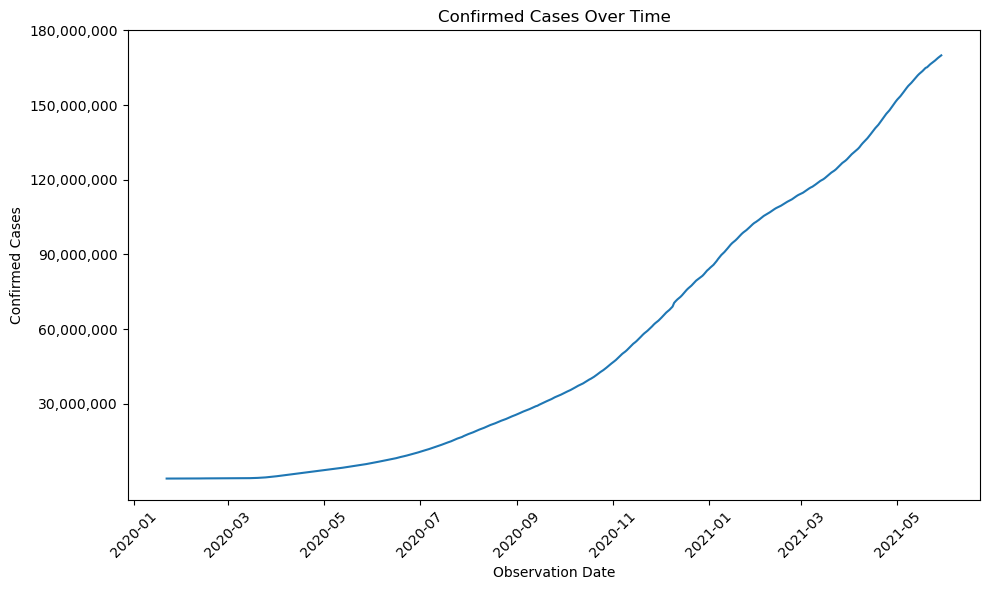

In [15]:
# Plot the trend in the total number of confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(covid_df.groupby("Observation Date")["Confirmed"].sum())
plt.xlabel('Observation Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed Cases Over Time')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.yticks([30000000, 60000000, 90000000, 120000000, 150000000, 180000000], 
           ['30,000,000', '60,000,000', '90,000,000', '120,000,000', '150,000,000', '180,000,000'])
plt.tight_layout()
plt.show()

This line graph shows a clear exponential rise in confirmed COVID-19 cases from early 2020 to mid-2021. Initial growth is slow, but cases surge from mid-2020, reflecting global spread and multiple waves. By May 2021, the curve continues upward with no sign of slowing, indicating ongoing rapid increases in case counts despite public health efforts.

### Which countries had the highest number of confirmed COVID-19 cases?

In [16]:
top_countries = covid_df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_countries)

Country
US         6049145667
India      3226768088
Brazil     2653587540
Russia      930548849
France      855189211
UK          783794384
Spain       649111763
Italy       636694305
Turkey      618940956
Germany     524166833
Name: Confirmed, dtype: int64


The U.S. leads by a significant margin, while India and Brazil follow closely, highlighting the pandemic's severe impact in these regions. Lower counts in Russia, France, and the UK suggest varying healthcare responses and transmission rates.

### How does the mortality rate (deaths/confirmed cases) vary across different countries?

In [17]:
covid_df['Mortality Rate'] = np.where(covid_df['Confirmed'] != 0,
                                      covid_df['Deaths'] / covid_df['Confirmed'], 
                                      np.nan)
mortality_rate = covid_df.groupby('Country')['Mortality Rate'].mean()
top_mortality_rate = mortality_rate.sort_values(ascending=False).head(10)

print(f"The average mortality rate is {mortality_rate.mean():.2f}")

The average mortality rate is 0.02


In [18]:
print(top_mortality_rate)

Country
Yemen         0.246477
MS Zaandam    0.220145
Belgium       0.126471
Mexico        0.106995
Sudan         0.090323
Hungary       0.062005
Ecuador       0.061822
Italy         0.059882
Syria         0.057377
Liberia       0.056756
Name: Mortality Rate, dtype: float64


A mortality rate of 0.02 (or 2%) indicates that 2 out of every 100 confirmed cases of a disease result in death. This suggests a significant risk, especially for vulnerable populations, while also implying that the disease can often be managed with proper healthcare responses. 

### What are the recovery rates for different countries?

In [19]:
covid_df['Recovery Rate'] = np.where(covid_df['Confirmed'] != 0,
                                      covid_df['Recovered'] / covid_df['Confirmed'], 
                                      np.nan)
recovery_rate = covid_df.groupby('Country')['Recovery Rate'].mean()
top_recovery_rate = recovery_rate.sort_values(ascending=False).head(10)

print(f"The average recovery rate is {recovery_rate.mean()}")

The average recovery rate is 0.5938869915339415


In [20]:
print(top_recovery_rate)

Country
Peru                     1.576970
Diamond Princess         0.940392
Micronesia               0.937984
China                    0.908852
Brunei                   0.899703
Denmark                  0.876193
Marshall Islands         0.869159
Saint Kitts and Nevis    0.868472
New Zealand              0.861401
Iceland                  0.860889
Name: Recovery Rate, dtype: float64


A recovery rate of 0.59 (or 59%) indicates that 59% of individuals diagnosed with COVID-19 have recovered. This suggests a moderate level of recovery, but it also means that 41% of cases have not recovered, which could include ongoing treatments, complications, or fatalities. While the rate reflects some success in recovery efforts, it underscores the continued burden on healthcare systems and the need for ongoing public health measures.

### What is the trend in daily new confirmed cases globally and per country?

In [21]:
covid_df.sort_values(by=['Country', 'Observation Date'], inplace=True)

# Group by date and country, summing the confirmed cases
daily_cases = covid_df.groupby(['Observation Date', 'Country'])['Confirmed'].sum().reset_index()

# Calculate daily new confirmed cases
daily_cases['New Confirmed'] = daily_cases.groupby('Country')['Confirmed'].diff().fillna(0)

global_daily_cases = daily_cases.groupby('Observation Date')['New Confirmed'].sum().reset_index()

top_daily_cases = daily_cases.groupby('Country')['New Confirmed'].sum().reset_index().sort_values(by='New Confirmed', ascending=False).head(10)

print(top_daily_cases)

       Country  New Confirmed
204         US     33251938.0
89       India     27894799.0
26      Brazil     16471600.0
69      France      5719875.0
202     Turkey      5235977.0
162     Russia      4995611.0
203         UK      4496821.0
94       Italy      4213053.0
7    Argentina      3732262.0
72     Germany      3684668.0


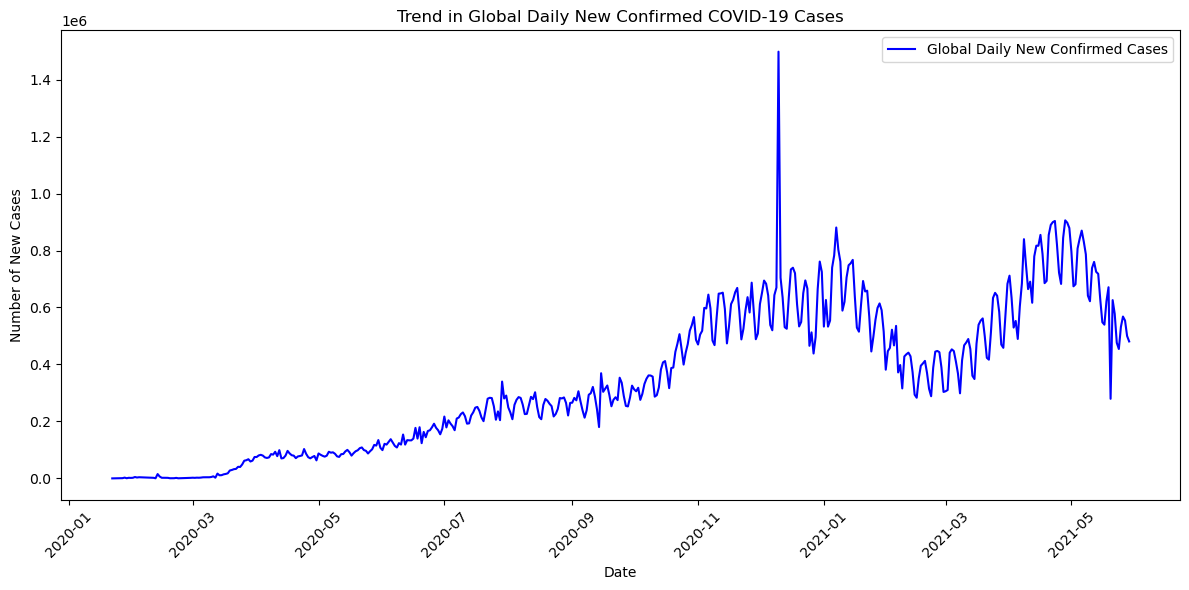

In [22]:
# Plot global daily new confirmed cases
plt.figure(figsize=(12, 6))
plt.plot(global_daily_cases['Observation Date'], global_daily_cases['New Confirmed'], label='Global Daily New Confirmed Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('Trend in Global Daily New Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line graph illustrates the global trend of daily new confirmed COVID-19 cases over time. The x-axis represents the date, spanning from early 2020 to mid-2021, while the y-axis depicts the number of new cases.

The graph showcases an overall upward trend in daily new cases, with noticeable fluctuations and distinct peaks. A significant surge is observed towards the end of 2020, followed by a period of sustained high numbers. The graph provides a visual representation of the global impact and spread of the COVID-19 pandemic during the period illustrated.

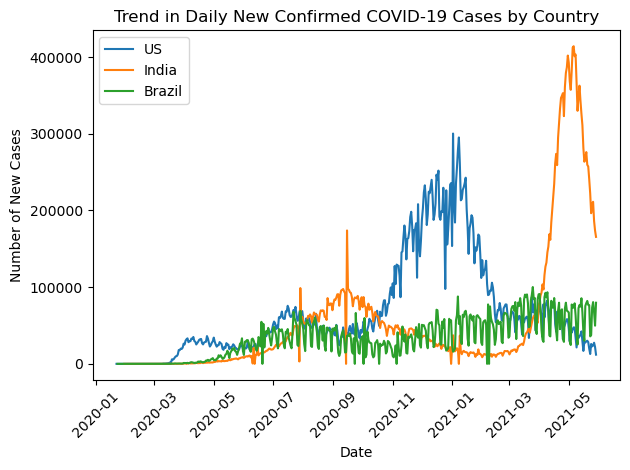

In [23]:
countries_to_plot = ['US', 'India', 'Brazil']
for country in countries_to_plot:
    country_data = daily_cases[daily_cases['Country'] == country]
    plt.plot(country_data['Observation Date'], country_data['New Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('Trend in Daily New Confirmed COVID-19 Cases by Country')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line graph shows the number of daily new COVID-19 cases in the US, India, and Brazil. The US had two large peaks, one in late 2020 and one in early 2021. India had one very large peak in mid-2021. Brazil had a more steady number of cases, with a small peak in early 2021.

### Are there any seasonal trends in the spread of COVID-19?

In [24]:
covid_df['Month'] = covid_df['Observation Date'].dt.strftime('%B')
seasonal_trend = covid_df.groupby('Month')['Confirmed'].sum()

In [25]:
# Sort the months by their calendar order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
                'September', 'October', 'November', 'December']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


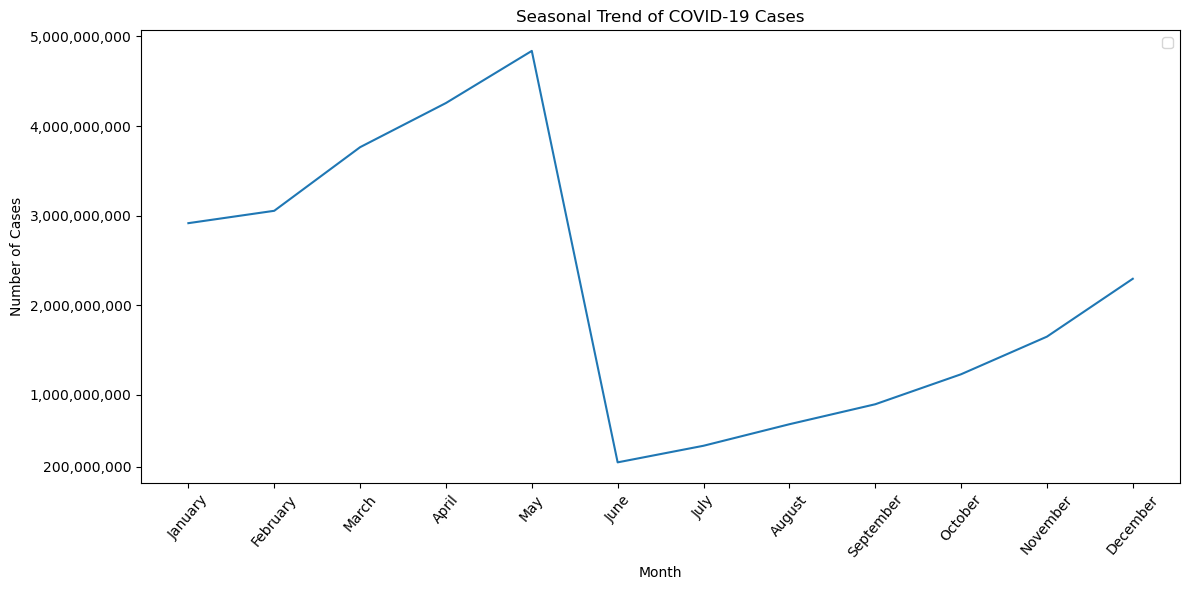

In [26]:
# Plot global daily new confirmed cases
plt.figure(figsize=(12, 6))
plt.plot(covid_df.groupby("Month")["Confirmed"].sum().reindex(months_order).dropna())
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Seasonal Trend of COVID-19 Cases')
plt.xticks(rotation=50)
plt.yticks([200000000, 1000000000, 2000000000, 3000000000, 4000000000, 5000000000], 
           ['200,000,000', '1,000,000,000', '2,000,000,000', '3,000,000,000', '4,000,000,000', '5,000,000,000'])
plt.legend()
plt.tight_layout()
plt.show()

COVID-19 cases peak in spring (May), indicating heightened transmission. They decline significantly in early summer (June), likely due to warmer weather and outdoor activities, before rising steadily from summer through fall and winter, driven by indoor gatherings and holiday travel.

### Impact of Lockdown on Cases

In [27]:
# Define lockdown periods (example)
covid_df['Is_Lockdown'] = np.where((covid_df['Observation Date'] >= '2020-03-15') & (covid_df['Observation Date'] <= '2020-06-01'), True, False)

In [28]:
# Aggregate daily new cases
covid_df['New_Confirmed'] = covid_df['Confirmed'].diff().fillna(0)

In [29]:
# Group by date and lockdown status
daily_cases = covid_df.groupby(['Observation Date', 'Is_Lockdown'])['New_Confirmed'].sum().reset_index()

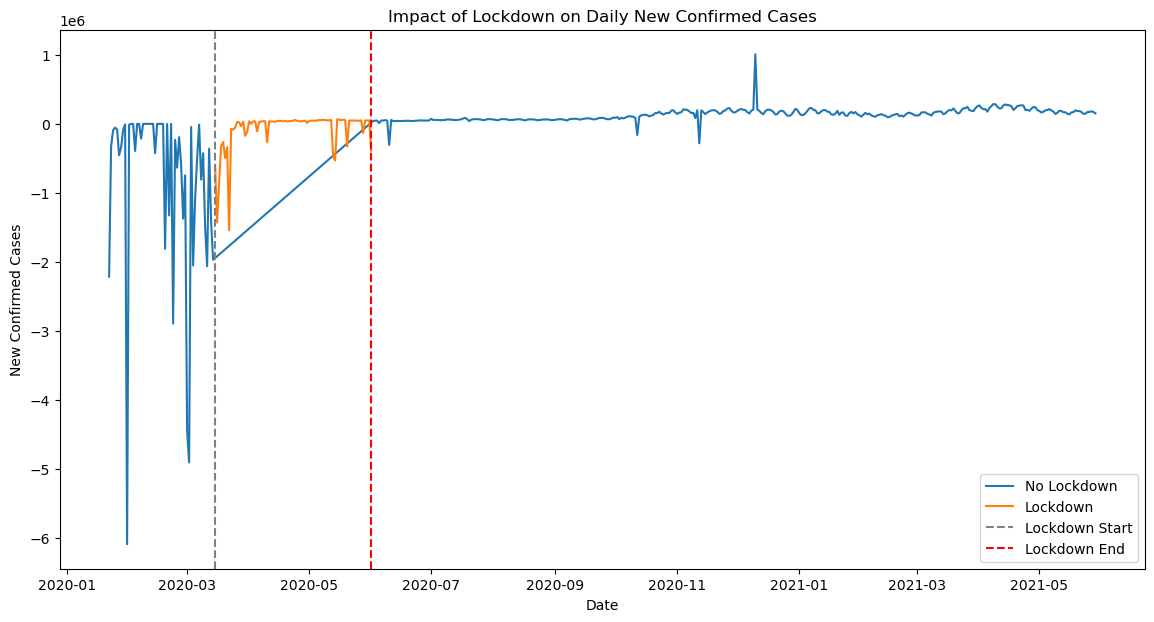

In [30]:
# Plotting
plt.figure(figsize=(14, 7))
for label, df in daily_cases.groupby('Is_Lockdown'):
    plt.plot(df['Observation Date'], df['New_Confirmed'], label='Lockdown' if label else 'No Lockdown')

plt.axvline(x=pd.to_datetime('2020-03-15'), color='gray', linestyle='--', label='Lockdown Start')
plt.axvline(x=pd.to_datetime('2020-06-01'), color='red', linestyle='--', label='Lockdown End')
plt.title('Impact of Lockdown on Daily New Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases')
plt.legend()
plt.show()

The graph suggests a decrease in daily new confirmed cases following the implementation of the lockdown

## Conclusion

In conclusion, this COVID-19 analysis highlights the dynamic and evolving nature of the pandemic across different regions. While early 2020 saw rapid growth in confirmed cases and mortality rates, global responses such as lockdowns and improved medical interventions helped stabilize the situation over time. However, second waves and regional disparities particularly in countries like the U.S., India, and Brazil, the ongoing challenges in managing the virus. Understanding these trends is crucial for guiding future public health strategies and ensuring preparedness for similar crises in the future.